In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [9]:
imp = signal.unit_impulse(500)
b, a = signal.butter(6, 0.038)
impulseResponse = signal.lfilter(b, a, imp)

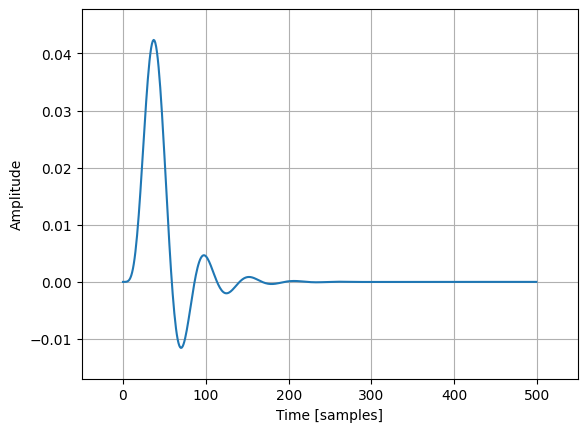

In [10]:
plt.plot(np.arange(0, 500), impulseResponse)
plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import struct


# Replace 'directory' with the path to your binary file
directory = '/Users/aseivane/Documents/SHM/SHM-analisis-mediciones/mediciones/medicion_20230719-015/nodo_34ab958660d0/20230719-015-0.dat'

# Define the data type and width for your binary file
dtype = np.float64  # Data type of the values in the second column
#Las muestras se guardan de a 14 bytes
BYTES_MUESTRA = 14     # Width of each value in bytes (assuming float64)
#Los primeros 23 bytes corresponden al encabezado y se tiran
BYTES_ENCABEZADO = 23

# Initialize an empty list to store the values from the second column
second_column_values = []

# Open the binary file in binary mode
with open(directory, 'rb') as binary_file:
    binary_file.read(BYTES_ENCABEZADO) #tira los datos del encabezado
    muestra = binary_file.read(BYTES_MUESTRA)
    
    while True:
        # Break the loop if no more data is available
        if not muestra or len(muestra)!=BYTES_MUESTRA:
            break
        
        # Unpack the binary data into a float using struct.unpack
        values = struct.unpack('7h', muestra)

        # Extract the second element from the array
        value = values[1]
        
        # Append the value to the list
        second_column_values.append(value)
        muestra = binary_file.read(BYTES_MUESTRA)

# Convert the list to a NumPy array
aceleracionY = np.array(second_column_values)

In [12]:

aceleracionY = (aceleracionY - np.mean(aceleracionY))/16384
aceleracionY = aceleracionY * 9.806
aceleracionYCortado = aceleracionY

corr = signal.correlate(aceleracionYCortado, impulseResponse)
lags = signal.correlation_lags(len(aceleracionYCortado), len(impulseResponse))

#corr /= np.max(corr)


In [16]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex='all')
ax_orig.plot(aceleracionYCortado)
ax_orig.set_title('Nodo 1')

ax_noise.plot(impulseResponse)
ax_noise.set_title('Nodo2')


ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')

fig.tight_layout()
mpld3.display()